## This is a example of how you will be doing projects in python.
### Use markdown cells -OR- comments in cells to place AT LEAST the question number you are working on. 

3.	Import the required packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [5]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [6]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [7]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


In [8]:
gdp_df.info

<bound method DataFrame.info of      Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2023  1992.424394              NaN
1        Afghanistan  2022  1981.710168              NaN
2        Afghanistan  2021  2144.166570              NaN
3        Afghanistan  2020  2769.685745              NaN
4        Afghanistan  2019  2927.245144              NaN
...              ...   ...          ...              ...
8214        Zimbabwe  1994  3965.730986              NaN
8215        Zimbabwe  1993  3634.750494              NaN
8216        Zimbabwe  1992  3649.891947              NaN
8217        Zimbabwe  1991  4126.405247              NaN
8218        Zimbabwe  1990  4013.299059              NaN

[8219 rows x 4 columns]>

In [9]:
type('Country or Area')

str

In [10]:
type('Year')

str

In [11]:
type('Value')

str

In [12]:
type('Value Footnotes')

str

In [13]:
type(gdp_df)

pandas.core.frame.DataFrame

5. How many rows and columns are in `gdp_df`? What are the data types of each column?

8219 rows, 4 columns; Country or Area = Str; Year = Str (looks like Int); Value = Str (looks like Float); Value Footnotes = Str (says it's NaN)

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [17]:
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value': 'GDP_Per_Capita'})
gdp_df = gdp_df.drop('Value Footnotes', axis=1)

7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 


233 countries have data for all years.  The following countries are missing > 10 years worth of data:

Virgin Islands                                        
Cayman Islands                                        
Faroe Islands                                         
Kosovo                                                
Sint Maarten (Dutch part)                             
Turks and Caicos Islands                              
Djibouti     

One pattern that emerges from this is that 5 of the 7 countries which are missing significant amounts of data are island nations.  

In [20]:
##counting the number of years per country value
pd.set_option('display.max_rows', None)
gdp_df['Country'].value_counts()

Country
Latvia                                                34
North America                                         34
Mongolia                                              34
Morocco                                               34
Mozambique                                            34
Myanmar                                               34
Namibia                                               34
Nauru                                                 34
Nepal                                                 34
Netherlands                                           34
New Zealand                                           34
Nicaragua                                             34
Niger                                                 34
Nigeria                                               34
North Macedonia                                       34
Middle income                                         34
Norway                                                34
OECD members           

In [21]:
##counting number of countries per year value
pd.set_option('display.max_rows', None)
gdp_df['Year'].value_counts()

Year
2021    247
2020    247
2019    247
2018    247
2017    247
2016    247
2015    247
2014    247
2013    247
2012    246
2022    246
2011    246
2010    245
2009    245
2008    244
2007    242
2006    242
2005    241
2004    241
2003    241
2002    241
2000    240
2023    240
2001    240
1999    238
1998    238
1997    238
1996    236
1995    236
1994    235
1993    234
1992    234
1991    234
1990    233
Name: count, dtype: int64

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?


The distribution of the data is skewed towards the lower end values.  The violin plot is basically the the density plot turned upright and then mirrored.  The outliers are significantly more visible in the boxplot.  

In [24]:
##filter data into a new variable to contain only 2020 data
year_2020 = gdp_df[gdp_df['Year'] == 2020]
print(year_2020)

                                                Country  Year  GDP_Per_Capita
3                                           Afghanistan  2020     2769.685745
27                          Africa Eastern and Southern  2020     3861.111238
61                           Africa Western and Central  2020     4622.731427
95                                              Albania  2020    14650.395929
129                                             Algeria  2020    14194.155748
163                                             Andorra  2020    55488.490299
197                                              Angola  2020     7556.967928
231                                 Antigua and Barbuda  2020    23915.161984
265                                          Arab World  2020    15316.627200
299                                           Argentina  2020    23877.093140
333                                             Armenia  2020    15052.935979
367                                               Aruba  2020   

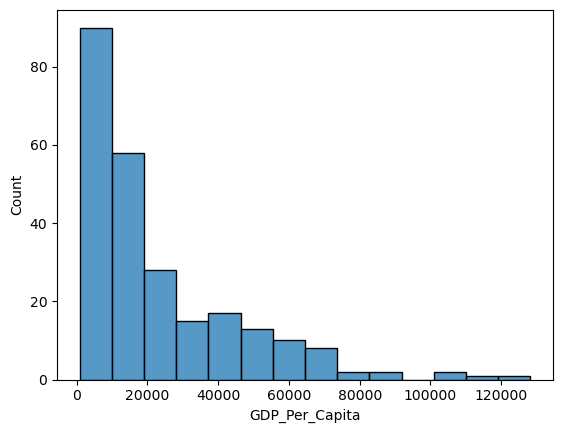

In [25]:
##histogram code
sns.histplot(data=year_2020, x="GDP_Per_Capita")
plt.show()

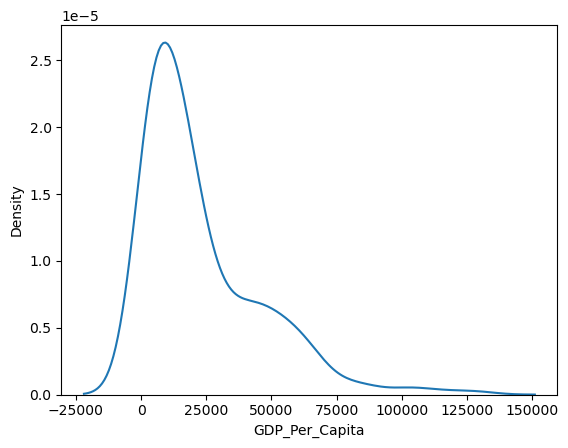

In [53]:
##density plot
sns.kdeplot(year_2020['GDP_Per_Capita'])
plt.show()

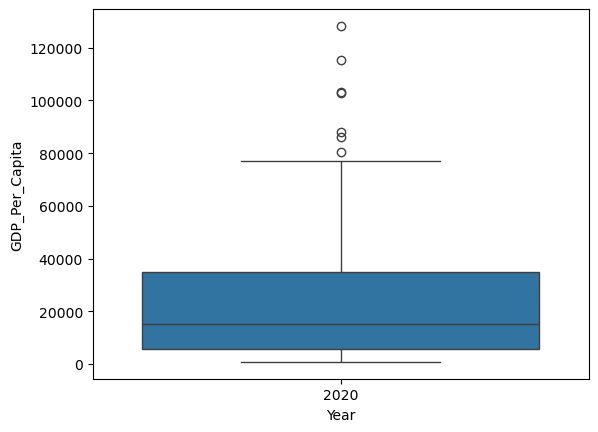

In [59]:
##boxplot
sns.boxplot( x=year_2020['Year'], y=year_2020['GDP_Per_Capita'])
plt.show()

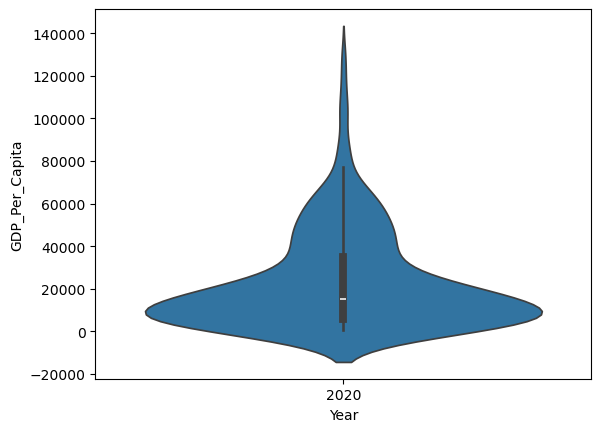

In [61]:
##violin plot
sns.violinplot(x=year_2020['Year'], y=year_2020['GDP_Per_Capita'])
plt.show()

9. What was the median GDP per capita value in 2020?

Median GDP in 2020: 15309.24

In [72]:
print(year_2020['GDP_Per_Capita'].median())

15309.23598817024


10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.


In [80]:
year_2020 = gdp_df[gdp_df['Year'] == 2020]


## this doesn't work.  Revise, yo!
decade_1990 = gdp_df[gdp_df['Year'] >= 1990 and <= 1999]
print(decade_1990)

SyntaxError: invalid syntax (3281108034.py, line 3)